# CS170 - Introduction to Data Science (Preparing data to model)
Instructions Answer each line item by replacing the blanks with the necessary operator or a value. Make sure the kernel is set to Python 3** Once done, right click the actual notebook page and print as PDF. Last part of the notebook is the code for timestamp from your computer - Run it!.

In [44]:
# import required package
import pandas as pd #This line imports the Pandas library and set as pd an alias for pandas.

#upload file using google colab

from google.colab import files #this line is using files.upload() method to import the file module from Google Colab.
adult = files.upload() #The variable 'adult' stores the updated file's contents.

Saving Adult.csv to Adult (2).csv


In [45]:
# The pandas package reads the csv file adult data.
adult = pd.read_csv(r"Adult.csv") #The contents from adult csv file is load in adult dataframe.

Partition the data set, so that 50% of the records are included in the training data set and 50% are included in the test data set. Use a bar graph to confirm your proportions.

In [64]:
# import required packages
#To facilitate the dataset partitions into training and testing subsets, the train_test_split module from scikit-learn is imported
from sklearn.model_selection import train_test_split
# The model selection module is used for ross-validation, parameter-tuning, and splitting datasets in 2 subsets, the training and testing sets (Ebner, 2022).

import pandas #For python's data manipulation and analysis, the pandas library is imported

In [65]:
# create partition. test is half
#This utilizes the train_test_split function to participate the 'adult' dataset into training (adult_train) and testing (adult_test) sets.
adult_train, adult_test= train_test_split(adult, test_size = 0.5, random_state = 7)
#Testing and setting random_state io 7 and allocating 50% for reproducibility.

In [66]:
# collect proportion values in a dataframe
# Create a DataFrame 'df' to store the proportion values of the training and testing datasets.
#The DataFrame is a powerful data manipulation and analysis library for Python (Starkman, 2021)
df = pd.DataFrame({'Partition':['train','test'],
	                   'Portion':[(adult_train.shape[0]/adult.shape[0]),
	                              (adult_test.shape[0]/adult.shape[0])]
	                   })

#The values containing respective proportions are corresponding in training or testing set and it's indicated in 'Partition' column.

<Axes: xlabel='Partition'>

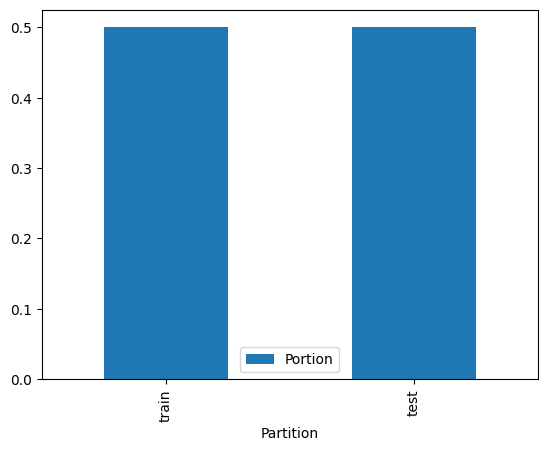

In [49]:
# create barplot

# Make a new DataFrame called "df" with two columns called "Partition," which stand for the train and test data subsets, and populate it with the appropriate values.
# Create a bar plot by setting the 'Partition' column as the DataFrame 'df' index.

df.set_index('Partition').plot(kind='bar')

Identify the total number of records in the training data set, and how many records in the training data set have an income value of >50 K.  

In [50]:
# Output the total number of records in the training dataset using the print statement.

#This data helps to clarify the amount of the training data by giving a brief overview of the dataset size.
print('The total number of records in the training dataset is', adult.shape[0]) #Displays the adult.shape values.

The total number of records in the training dataset is 25000


In [67]:
# Print the number of entries in the training dataset with the label ">50K" in the "income" column.

# The number of examples in the training data set linked to an income of more than $50,000 is shown by this line.
print('There are', adult_train.loc[adult_train['income']=='>50K.'].shape[0], 'records in the training data set that have “>50K” income')
# Displays the output about the count of records with an income greater than $50,000.

There are 2981 records in the training data set that have “>50K” income


Use your answers from the previous exercise to calculate how many records with income >50 K you need to resample in order to have 35% of the rebalanced data set have incomes of >50 K

In [52]:
# Determine how many records in the training dataset have the label ">50K" in the "income" column.
greater_50K_records = adult_train.loc[adult_train['income']=='>50K'].shape[0]
total_records = adult_test.shape[0] # Retrieve the total number of records in the testing dataset in the 'total_records' variable.

In [53]:
# determine portion size to ressample (by 35%)

(0.35 * 25000 - 2981) / 0.65 # Using the provided formula, determine the chunk size for resampling with a 35% reduction in the total.
# The result shows the appropriate serving size that would result in a 35% decrease in the initial total when sampled.

8875.384615384615

Perform the rebalancing described in the previous exercise and confirm that 35% of the records in the rebalanced data set have incomes >50 K.

In [68]:
# subset the records to be resampled
# to_resample is typically used to represent a subset of a DataFrame that is selected for the purpose of resampling in the context of data analysis or machine learning (Mishra, 2021).
to_resample = adult_train.loc[adult_train['income']=='>50K.']
# Only the training dataset records linked to incomes over $50,000 are now present in the 'to_resample' DataFrame.

In [55]:
# resample the '>50K' records to the determined sample size

# Sample 8875 entries from the 'to_resample' DataFrame to create a new DataFrame called 'our_resample'.
# The'replace=True' argument facilitates replacement, allowing for several samplings of each record, which helps with resampling.

our_resample = to_resample.sample(n = 8875, replace = True)


In [69]:
# concatenate the sampled data with the rest of the training data so that it's rebalanced
# By merging the two datasets, the 'adult_train_rebal' DataFrame is created, with the intention of resolving class disparities.
adult_train_rebal = pd.concat([adult_train, our_resample])
# pd.concat is a pandas function used for concatenating (combining) two or more pandas (DataFrames or Series) along a particular axis (Chen, 2020).


The baseline is determined by looking at which income class has the greatest proportion of the data which is <=50K. If a model were to predict no >50K then the model would have an accuracy of 76%. Therefore the selected model would have to outperform this baseline model in order to have any use in the real world.

In [70]:
# table proportion of income classes in training data
# value_counts() method in pandas is used to obtain a series containing counts of unique values in a pandas Series or DataFrame column (Egan, 2021).
adult_train_rebal['income'].value_counts() / adult_train_rebal.shape[0]
# The proportions that emerge offer valuable information about the distribution of income groups and demonstrate how well the resampling procedure balanced the dataset.

>50K.     0.554667
<=50K.    0.445333
Name: income, dtype: float64

Validate your partition by performing a two‐sample Z‐test for the difference in means for the mean age in the training set versus the mean age in the test set.

In [58]:
# No editing beyond this point, just run all the cells and make sure there is no errors.

from numpy import sqrt, abs, round
from scipy.stats import norm
from statistics import stdev

n1 = adult_train.shape[0]
x1 = adult_train['age'].mean()
sd1 = stdev(adult_train['age'])

n2 = adult_test.shape[0]
x2 = adult_test['age'].mean()
sd2 = stdev(adult_test['age'])

In [ ]:
print("Shape of trainig data", n1)
print("Mean of age in the training data", x1)
print("Standard deviation of age in training date", sd1, "\n")

print("Shape of test data", n2)
print("Mean of age in the test data", x2)
print("Standard deviation of age in the test data", sd2)

Shape of trainig data 12500
Mean of age in the training data 38.61032
Standard deviation of age in training date 13.708895805408117 

Shape of test data 12500
Mean of age in the test data 38.60352
Standard deviation of age in the test data 13.667157235670935


In [59]:
# calculate the denominator pooled standard error
pooledSE = sqrt(sd1**2/n1 + sd2**2/n2)
print(pooledSE)

0.17314156314601958


In [60]:
#calculate z value
z = round(((x1 - x2) - 0) /pooledSE,6)
# caluculate p-value
pval =  round(2*(1 - norm.cdf(abs(z))),6)

In [61]:
print("Zed Value: ", z)
print("P-Value: ",pval)

Zed Value:  0.039274
P-Value:  0.968672


Validate your partition by performing a two‐sample Z‐test for the difference in proportions for the proportion of >50 K records in the training set versus the proportion of >50 K records in the test set.

In [62]:
n1 = adult_train.shape[0]
x1 = adult_train.loc[adult_train['income']=='>50K.'].shape[0]
p1 = x1 / n1

n2 = adult_test.shape[0]
x2 = adult_test.loc[adult_test['income']=='>50K.'].shape[0]
p2 = x2 / n2

p = (x1+x2)/(n1+n2)

#calculate z value
z = round(((p1-p2)-0)/sqrt(p*(1-p)*(1/n1+1/n2)),6)

14.	# caluculate p-value
pval =  round(2*(1 - norm.cdf(abs(z))),6)

In [ ]:
print("Zed Value: ", z)
print("P-Value: ",pval)

Zed Value:  -0.32609
P-Value:  0.744356


7. Because the p-value > than alpha 0.05 the null hypothesis H0 is accepted. Meaning that there is no evidence of significant difference between the >50K income proportions in the training and test datasets

In [63]:
import datetime
import socket
def get_Host_name_IP():
    try:
        host_name = socket.gethostname()
        host_ip = socket.gethostbyname(host_name)
        print("Hostname:",host_name)
        print("IP Address:",host_ip)
    except:
        print("No visible IP Address")
get_Host_name_IP()
now = datetime.datetime.now()
print ("Time Stamp:", now.strftime("%Y-%m-%d %H:%M:%S"))

Hostname: 87f6d326dfc2
IP Address: 172.28.0.12
Time Stamp: 2024-01-18 13:48:55


**References**

Chen, B. (2020, October 31). Pandas concat() tricks you should know to speed up your data analysis. Retrieved from Medium: https://towardsdatascience.com/pandas-concat-tricks-you-should-know-to-speed-up-your-data-analysis-cd3d4fdfe6dd

Ebner, J. (2022, May 16). How to Use Sklearn train_test_split in Python. Retrieved from Sharp Sight: https://www.sharpsightlabs.com/blog/scikit-train_test_split/

Egan, C. (2021, April 05). Pandas III: value_counts(), duplicated(), min(), max(). Retrieved from Medium: https://towardsdatascience.com/pandas-iii-value-counts-duplicated-min-max-d705cae54862

Mishra, S. (2021, January 20). Resample function of Pandas. Retrieved from Medium: https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78

Starkman, S. (2021, October 01). A Simple Guide To Pandas DataFrames. Retrieved from Medium: https://towardsdatascience.com/a-simple-guide-to-pandas-dataframes-b125f64e1453